In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})

BIG_SIZE = 14
BIGGER_SIZE = 16
BIGGEST_SIZE = 20

matplotlib.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

In [3]:
data1 = np.load('./data_for_xi_calculation/dX_data_t=50_to_t=100_grid_64_c_1by64.npz')
data2 = np.load('./data_for_xi_calculation/dX_data_t=100_to_t=110_grid_64_c_1by64.npz')

In [4]:
data1.files

['dX_x', 'dX_y']

In [5]:
# combining the data
dX1 = np.concatenate((data1['dX_x'], data2['dX_x']), axis=0)
dX2 = np.concatenate((data1['dX_y'], data2['dX_y']), axis=0)

In [6]:
dX1.shape, dX2.shape

((600, 49409), (600, 49409))

In [7]:
dX = np.concatenate((dX1, dX2), axis=1)
dX.shape

(600, 98818)

In [8]:
m = dX.shape[0]
print(m)

600


In [9]:
from numpy import linalg as LA
from scipy import signal

In [10]:
Dt_c = 0.1
scaled_dX = dX*np.sqrt(Dt_c)

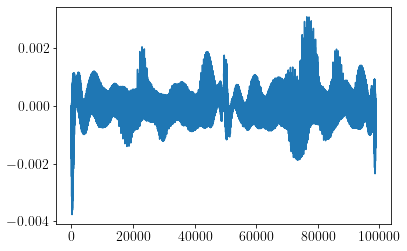

In [11]:
plt.plot(np.mean(scaled_dX, axis=0))

In [12]:
F = signal.detrend(scaled_dX, axis=0, type='constant')
F.shape

(600, 98818)

In [13]:
A, b, CT = LA.svd(F, full_matrices=False)

In [14]:
b**2/(m-1)

array([1.35236693e-02, 7.15600434e-03, 6.85312808e-03, 6.35160377e-03,
       5.48520757e-03, 4.32138951e-03, 3.93330131e-03, 3.50568173e-03,
       3.16266504e-03, 2.97989040e-03, 2.76713711e-03, 2.47025900e-03,
       2.06571713e-03, 1.97351348e-03, 1.91883135e-03, 1.63112307e-03,
       1.46695087e-03, 1.41923021e-03, 1.34587187e-03, 1.23908807e-03,
       1.16042416e-03, 1.10804977e-03, 1.07370605e-03, 1.00143668e-03,
       9.08467841e-04, 8.60633798e-04, 8.08651510e-04, 7.75161055e-04,
       7.10453694e-04, 6.14256181e-04, 6.01188647e-04, 5.56037246e-04,
       5.50004396e-04, 5.12670318e-04, 4.84338294e-04, 4.41733483e-04,
       4.15682392e-04, 3.99984365e-04, 3.81228428e-04, 3.55686215e-04,
       3.48903932e-04, 3.40260293e-04, 3.14920792e-04, 2.99611495e-04,
       2.44722883e-04, 2.17981115e-04, 2.12275851e-04, 2.05241873e-04,
       1.90499387e-04, 1.88794611e-04, 1.83186507e-04, 1.61976099e-04,
       1.54145855e-04, 1.46711553e-04, 1.41911324e-04, 1.30998073e-04,
      

In [15]:
b/np.sqrt(m-1)

array([1.16291312e-01, 8.45931696e-02, 8.27836220e-02, 7.96969496e-02,
       7.40621872e-02, 6.57372764e-02, 6.27160371e-02, 5.92087977e-02,
       5.62375768e-02, 5.45883724e-02, 5.26035845e-02, 4.97017001e-02,
       4.54501610e-02, 4.44242443e-02, 4.38044673e-02, 4.03871647e-02,
       3.83007946e-02, 3.76726720e-02, 3.66861265e-02, 3.52006827e-02,
       3.40649991e-02, 3.32873816e-02, 3.27674541e-02, 3.16454843e-02,
       3.01408003e-02, 2.93365608e-02, 2.84367985e-02, 2.78417143e-02,
       2.66543372e-02, 2.47841922e-02, 2.45191486e-02, 2.35804420e-02,
       2.34521725e-02, 2.26422242e-02, 2.20076872e-02, 2.10174566e-02,
       2.03882906e-02, 1.99996091e-02, 1.95250718e-02, 1.88596451e-02,
       1.86789703e-02, 1.84461457e-02, 1.77460078e-02, 1.73092893e-02,
       1.56436212e-02, 1.47641835e-02, 1.45696895e-02, 1.43262651e-02,
       1.38021515e-02, 1.37402551e-02, 1.35346410e-02, 1.27269831e-02,
       1.24155489e-02, 1.21124545e-02, 1.19126539e-02, 1.14454389e-02,
      

In [16]:
B = np.diag(b/np.sqrt(m-1))
B.shape, CT.shape

((600, 600), (600, 98818))

In [17]:
BCT = np.matmul(B, CT)

In [18]:
var_vec = b**2/(m-1)

In [19]:
n_eigval = 75

p1 = 100*np.sum(var_vec[:n_eigval])/(np.sum(var_vec))

print(f'Total vairance captured by first {n_eigval} eigenvalues: {p1}')

Total vairance captured by first 75 eigenvalues: 99.00893075992475


In [20]:
n_eigval = 32

p1 = 100*np.sum(var_vec[:n_eigval])/(np.sum(var_vec))

print(f'Total vairance captured by first {n_eigval} eigenvalues: {p1}')

Total vairance captured by first 32 eigenvalues: 90.02295062738378


In [21]:
n_eigval = 14

p1 = 100*np.sum(var_vec[:n_eigval])/(np.sum(var_vec))

print(f'Total vairance captured by first {n_eigval} eigenvalues: {p1}')

Total vairance captured by first 14 eigenvalues: 69.86636951448999


In [22]:
n_eigval = 7

p1 = 100*np.sum(var_vec[:n_eigval])/(np.sum(var_vec))

print(f'Total vairance captured by first {n_eigval} eigenvalues: {p1}')

Total vairance captured by first 7 eigenvalues: 49.99817917065948


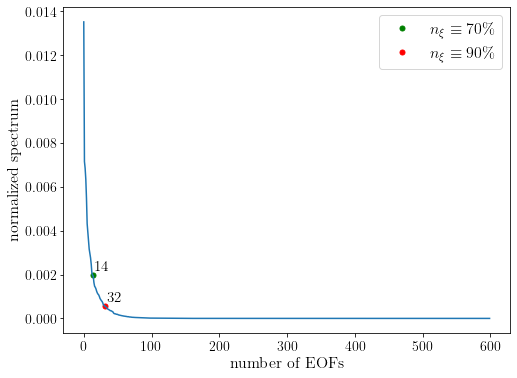

In [33]:
fig, ax = plt.subplots(figsize=(8,6))
# ax.plot(6,var_vec[6], 'bo', ms=5, label=r'$n_{\xi} \equiv 50 \%$')
ax.plot(13,var_vec[13], 'go', ms=5, label=r'$n_{\xi} \equiv 70 \%$')
ax.plot(31,var_vec[31], 'ro', ms=5, label=r'$n_{\xi} \equiv 90 \%$')
ax.plot(np.arange(var_vec.size),var_vec)
ax.legend(loc = "upper right")
ax.set_xlabel(r"number of EOFs")
ax.set_ylabel(r"normalized spectrum")
ax.annotate(f"{14}", (13, var_vec[13]), fontsize= 15, textcoords="offset points", xytext=(10,5), ha= 'center')
ax.annotate(f"{32}", (31, var_vec[31]), fontsize= 15, textcoords="offset points", xytext=(10,5), ha= 'center')
plt.savefig('./plots/64x64_normalised_spectrum.pdf', bbox_inches='tight')

In [25]:
combined_vec = BCT
detached_vec = np.zeros((combined_vec.shape[0],int(combined_vec.shape[1]/2),2))
for i in range(combined_vec.shape[0]):
    detached_vec[i,:,0] = combined_vec[i,:int(combined_vec.shape[1]/2)]
    detached_vec[i,:,1] = combined_vec[i,int(combined_vec.shape[1]/2):]
    
combined_vec.shape, detached_vec.shape

((600, 98818), (600, 49409, 2))

In [26]:
xi_mat = detached_vec

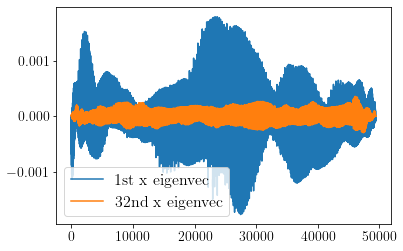

In [27]:
plt.plot(xi_mat[0,:,0], label='1st x eigenvec'), plt.plot(xi_mat[31,:,0], label='32nd x eigenvec')
plt.legend()

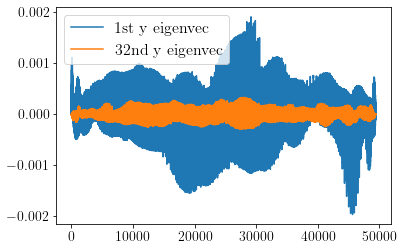

In [28]:
plt.plot(xi_mat[0,:,1], label='1st y eigenvec'), plt.plot(xi_mat[31,:,1], label='32nd y eigenvec')
plt.legend()

In [86]:
eig_vec = xi_mat[:75,:,:]
eig_vec.shape

(75, 49409, 2)

In [87]:
eig_vec[0,:].shape

(49409, 2)

In [88]:
data_file = './calculated_xi_vectors/xi_matrix_75_eigvec_c_1_by_64_decor_t_1_Dt_t=50_to_t=110.npz'

np.savez(data_file, xi_mat = eig_vec)